In [197]:
import pandas as pd

In [198]:
data=pd.read_csv('../data/data.csv',delimiter='\t')

In [199]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [200]:
removedataeatures = [f'Q{i}E' for i in range(1, 43)] # add feature 'Q1E' to 'Q42E' to be removed
removedataeatures.extend([f'Q{i}I' for i in range(1, 43)]) # add feature 'Q1E' to 'Q42E' to be removed
#removedataeatures.extend([f'VCL{i}' for i in range(1, 17)]) # add feature 'VCL1' to 'VCL16' to be removed
removedataeatures.extend([ 'source', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand',
    'voted', 'screensize', 'uniquenetworklocation'])


In [201]:
data.drop(removedataeatures, axis=1,inplace=True)
data.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,education,urban,gender,age,religion,orientation,race,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,...,2,3,2,16,12,1,10,1,2,NaN
1,4,1,2,3,4,4,3,4,3,2,...,2,3,2,16,7,0,70,1,4,NaN
2,3,1,4,1,4,3,1,3,2,4,...,2,3,2,17,4,3,60,1,3,NaN
3,2,3,2,1,3,3,4,2,3,3,...,1,3,2,13,4,5,70,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,...,3,2,2,19,10,1,10,1,4,Psychology


Text(0.5, 1.0, 'Top 20 Countries from where people participated in the Survey')

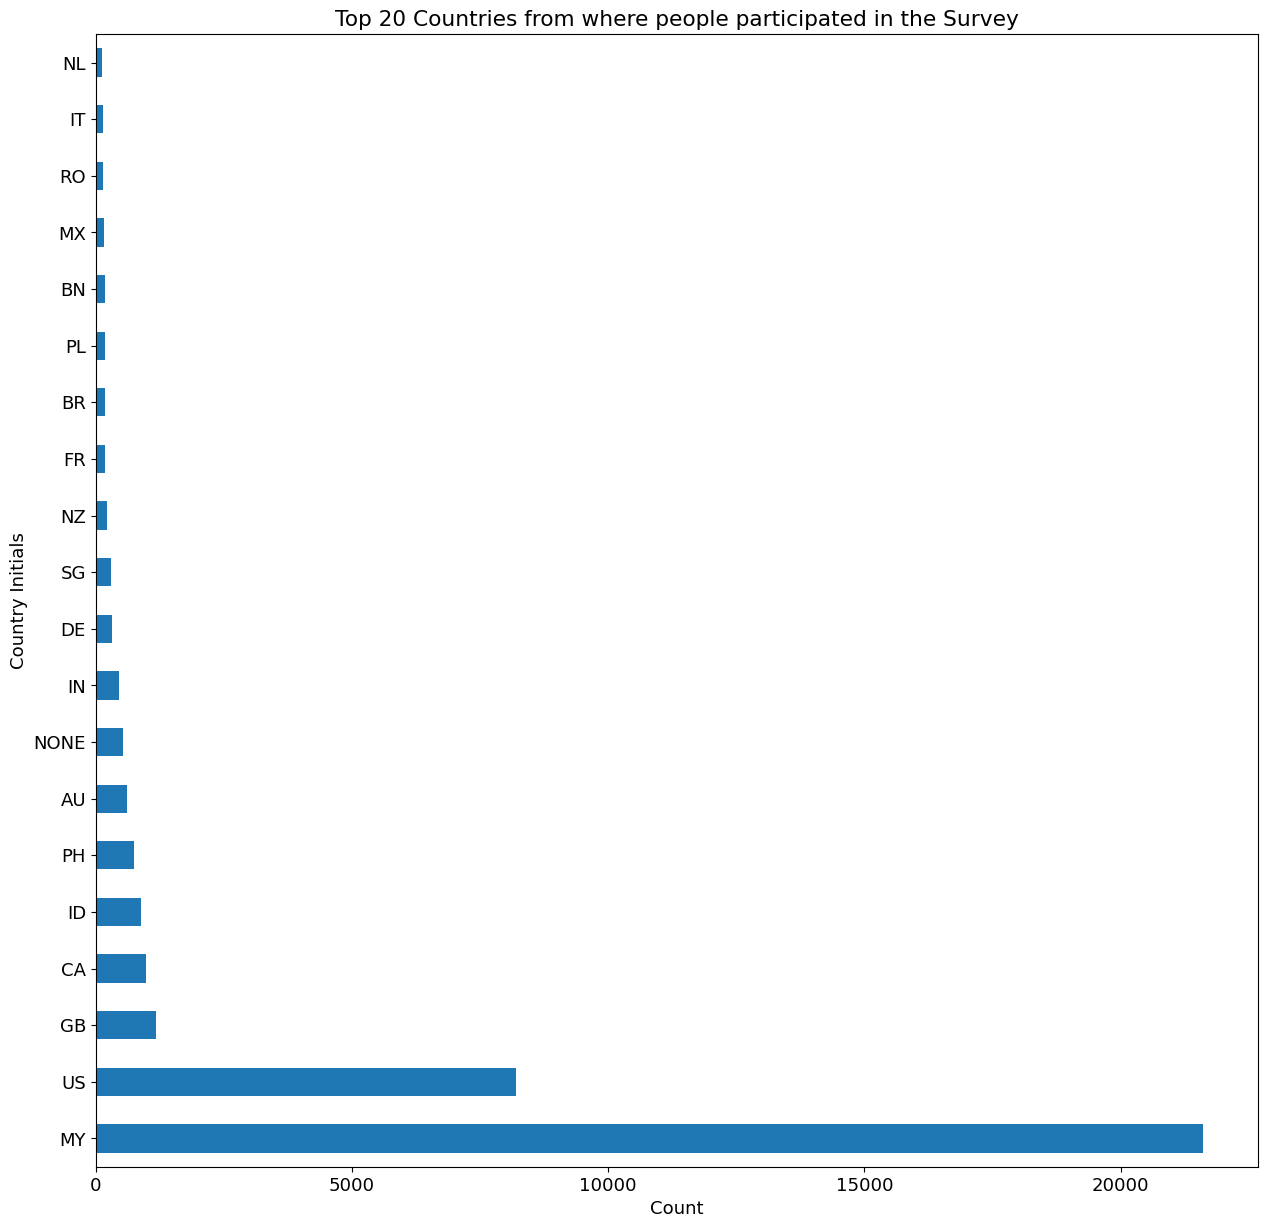

In [202]:
import matplotlib.pyplot as plt
data['country'].value_counts()[:20].plot(kind='barh')
plt.ylabel('Country Initials')
plt.xlabel('Count')
plt.title('Top 20 Countries from where people participated in the Survey')

In [203]:
data['VCL']=data['VCL1']+data['VCL2']+data['VCL3']+data['VCL4']+data['VCL5']-data['VCL6']+data['VCL7']+data['VCL8']-data['VCL9']+data['VCL10']+data['VCL11']-data['VCL12']+data['VCL13']+data['VCL14']+data['VCL15']+data['VCL16']

In [204]:
depression_ques = [ 'Q3A','Q5A','Q10A','Q13A','Q16A','Q17A','Q21A','Q24A','Q26A','Q31A','Q34A','Q37A','Q38A','Q42A']
anxiety_ques = [ 'Q2A','Q4A','Q7A','Q9A','Q15A','Q19A','Q20A','Q23A','Q25A','Q28A','Q30A','Q36A','Q40A','Q41A']
stress_ques = [ 'Q1A','Q6A','Q8A','Q11A','Q12A','Q14A','Q18A','Q22A','Q27A','Q29A','Q32A','Q33A','Q35A','Q39A']
general_questions = ['TIPI1', 'TIPI2',
       'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'age', 'religion', 'orientation',
       'race', 'married', 'familysize','country']
vocabulary_questions = ["VCL"]


# Depression

In [205]:
questions=anxiety_ques+general_questions + vocabulary_questions
depression=data[questions]


In [206]:
depression.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,urban,gender,age,religion,orientation,race,married,familysize,country,VCL
0,4,4,4,2,4,3,3,4,4,3,...,3,2,16,12,1,10,1,2,IN,8
1,1,3,3,3,3,1,1,1,2,4,...,3,2,16,7,0,70,1,4,US,8
2,1,1,1,2,4,2,1,2,2,1,...,3,2,17,4,3,60,1,3,PL,7
3,3,1,4,3,2,1,2,1,1,1,...,3,2,13,4,5,70,1,5,US,7
4,2,4,4,4,4,4,4,4,4,4,...,2,2,19,10,1,10,1,4,MY,10


In [207]:
depression[anxiety_ques] = depression[anxiety_ques].subtract(1,axis=1)

c:\Users\sonal\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [209]:
depression['total_score']=depression[anxiety_ques].sum(axis=1)

C:\Users\sonal\AppData\Local\Temp/ipykernel_21024/2231863086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression['total_score']=depression[anxiety_ques].sum(axis=1)


In [210]:
depression.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,gender,age,religion,orientation,race,married,familysize,country,VCL,total_score
0,3,3,3,1,3,2,2,3,3,2,...,2,16,12,1,10,1,2,IN,8,34
1,0,2,2,2,2,0,0,0,1,3,...,2,16,7,0,70,1,4,US,8,17
2,0,0,0,1,3,1,0,1,1,0,...,2,17,4,3,60,1,3,PL,7,12
3,2,0,3,2,1,0,1,0,0,0,...,2,13,4,5,70,1,5,US,7,17
4,1,3,3,3,3,3,3,3,3,3,...,2,19,10,1,10,1,4,MY,10,40


In [211]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>=28:
        return 'Extremely Severe'

depression['Condition']=depression['total_score'].apply(condition)
depression.head()


C:\Users\sonal\AppData\Local\Temp/ipykernel_21024/907916333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression['Condition']=depression['total_score'].apply(condition)


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,age,religion,orientation,race,married,familysize,country,VCL,total_score,Condition
0,3,3,3,1,3,2,2,3,3,2,...,16,12,1,10,1,2,IN,8,34,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,16,7,0,70,1,4,US,8,17,Moderate
2,0,0,0,1,3,1,0,1,1,0,...,17,4,3,60,1,3,PL,7,12,Mild
3,2,0,3,2,1,0,1,0,0,0,...,13,4,5,70,1,5,US,7,17,Moderate
4,1,3,3,3,3,3,3,3,3,3,...,19,10,1,10,1,4,MY,10,40,Extremely Severe


In [212]:
depression_us=depression[depression['country']=='US']

In [213]:
depression_us=depression_us[general_questions+['VCL','Condition']]

In [214]:
depression_us.drop('country',inplace=True,axis=1)

In [215]:
depression_us

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,urban,gender,age,religion,orientation,race,married,familysize,VCL,Condition
1,6,5,4,7,5,4,7,7,1,5,...,3,2,16,7,0,70,1,4,8,Moderate
3,1,1,7,4,6,4,6,1,6,1,...,3,2,13,4,5,70,1,5,7,Moderate
5,2,1,6,1,7,7,7,2,6,7,...,3,2,20,4,1,70,1,4,7,Normal
8,1,4,5,7,5,7,6,7,1,4,...,3,1,16,12,2,70,1,4,8,Extremely Severe
10,5,3,6,6,3,4,4,7,5,7,...,2,1,15,6,1,60,1,1,5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39766,4,1,7,7,7,7,7,1,1,1,...,2,2,19,4,1,70,1,2,8,Moderate
39768,6,5,6,7,6,4,6,5,5,3,...,1,2,27,4,1,60,1,3,11,Normal
39769,6,5,4,5,6,3,5,2,5,7,...,2,2,16,1,1,70,1,3,9,Severe
39772,6,6,7,5,6,3,6,1,5,4,...,2,2,48,7,1,30,2,3,6,Normal


In [216]:
depression_us.describe()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize,VCL
count,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000,8207.000000
mean,3.410138,4.054953,4.786889,5.268064,4.871451,5.069575,5.222127,4.075058,3.356038,3.191666,2.074083,2.127818,1.742293,24.703180,4.848178,1.678445,55.191909,1.269039,2.737419,8.427927
std,2.014978,1.847732,1.830772,1.794128,1.753913,1.858486,1.691402,2.013111,1.867199,1.838784,0.922870,0.743394,0.523160,12.488069,3.616162,1.170064,16.036277,0.574879,2.182094,2.295210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,10.000000,0.000000,0.000000,-2.000000
25%,2.000000,2.000000,3.000000,5.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,16.000000,2.000000,1.000000,60.000000,1.000000,2.000000,7.000000
50%,3.000000,4.000000,5.000000,6.000000,5.000000,6.000000,6.000000,5.000000,3.000000,3.000000,2.000000,2.000000,2.000000,20.000000,4.000000,1.000000,60.000000,1.000000,2.000000,9.000000
75%,5.000000,5.000000,6.000000,7.000000,6.000000,7.000000,7.000000,6.000000,5.000000,5.000000,3.000000,3.000000,2.000000,28.000000,7.000000,2.000000,60.000000,1.000000,3.000000,10.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,117.000000,12.000000,5.000000,70.000000,3.000000,133.000000,13.000000


In [217]:
depression_us = depression_us[depression_us.age <100]

In [218]:
depression_us = depression_us[depression_us.familysize <50]

In [219]:
depression_us.describe()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,orientation,race,married,familysize,VCL
count,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000,8204.000000
mean,3.410775,4.054608,4.787665,5.267674,4.872379,5.068991,5.222940,4.074232,3.356533,3.191126,2.074354,2.127986,1.742077,24.684178,4.847392,1.677840,55.193808,1.269137,2.714408,8.428937
std,2.014990,1.847520,1.830103,1.794250,1.753399,1.858553,1.690889,2.012995,1.867295,1.838815,0.922886,0.743259,0.523056,12.421077,3.615747,1.169815,16.033580,0.574961,1.505318,2.294367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,10.000000,0.000000,0.000000,-2.000000
25%,2.000000,2.000000,3.000000,5.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,16.000000,2.000000,1.000000,60.000000,1.000000,2.000000,7.000000
50%,3.000000,4.000000,5.000000,6.000000,5.000000,6.000000,6.000000,5.000000,3.000000,3.000000,2.000000,2.000000,2.000000,20.000000,4.000000,1.000000,60.000000,1.000000,2.000000,9.000000
75%,5.000000,5.000000,6.000000,7.000000,6.000000,7.000000,7.000000,6.000000,5.000000,5.000000,3.000000,3.000000,2.000000,28.000000,7.000000,2.000000,60.000000,1.000000,3.000000,10.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,82.000000,12.000000,5.000000,70.000000,3.000000,19.000000,13.000000


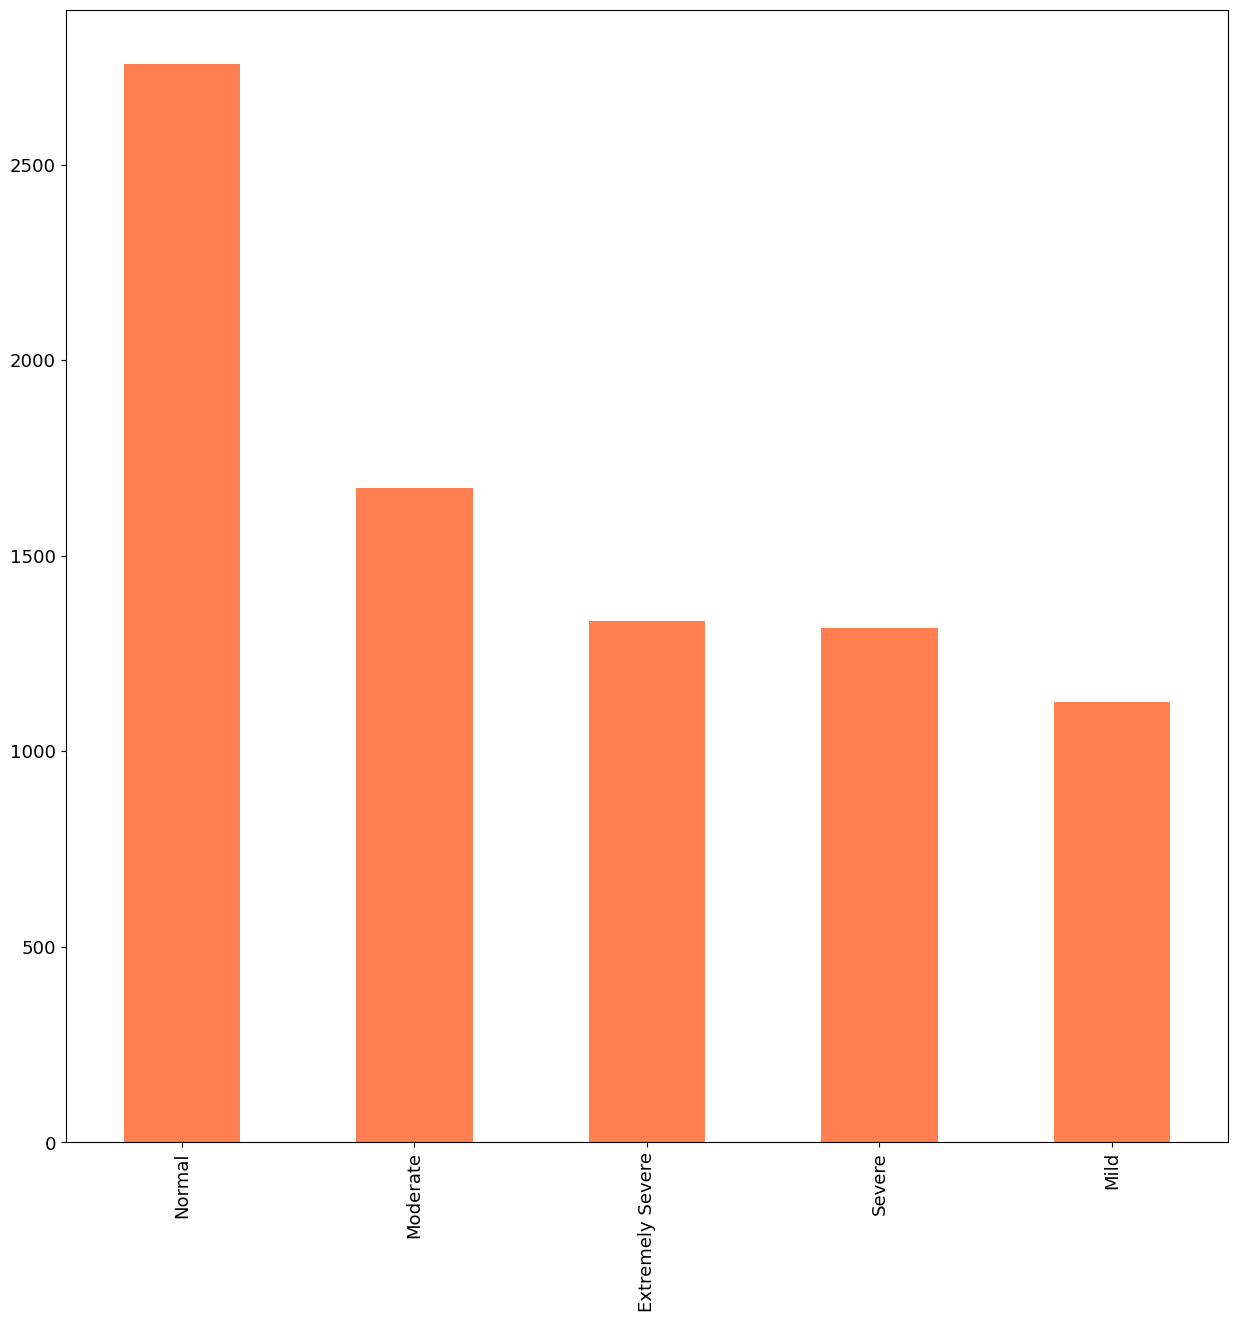

In [220]:
c=depression_us['Condition'].value_counts()
c.plot(kind = 'bar', color ='coral')
c=c.reindex(index = ['Extremely Severe','Severe','Moderate','Mild','Normal'])

In [221]:
depression_us['target']=depression_us.Condition.astype('category').cat.codes

In [222]:
depression_us


,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,gender,age,religion,orientation,race,married,familysize,VCL,Condition,target
1,6,5,4,7,5,4,7,7,1,5,...,2,16,7,0,70,1,4,8,Moderate,2
3,1,1,7,4,6,4,6,1,6,1,...,2,13,4,5,70,1,5,7,Moderate,2
5,2,1,6,1,7,7,7,2,6,7,...,2,20,4,1,70,1,4,7,Normal,3
8,1,4,5,7,5,7,6,7,1,4,...,1,16,12,2,70,1,4,8,Extremely Severe,0
10,5,3,6,6,3,4,4,7,5,7,...,1,15,6,1,60,1,1,5,Normal,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39766,4,1,7,7,7,7,7,1,1,1,...,2,19,4,1,70,1,2,8,Moderate,2
39768,6,5,6,7,6,4,6,5,5,3,...,2,27,4,1,60,1,3,11,Normal,3
39769,6,5,4,5,6,3,5,2,5,7,...,2,16,1,1,70,1,3,9,Severe,4
39772,6,6,7,5,6,3,6,1,5,4,...,2,48,7,1,30,2,3,6,Normal,3


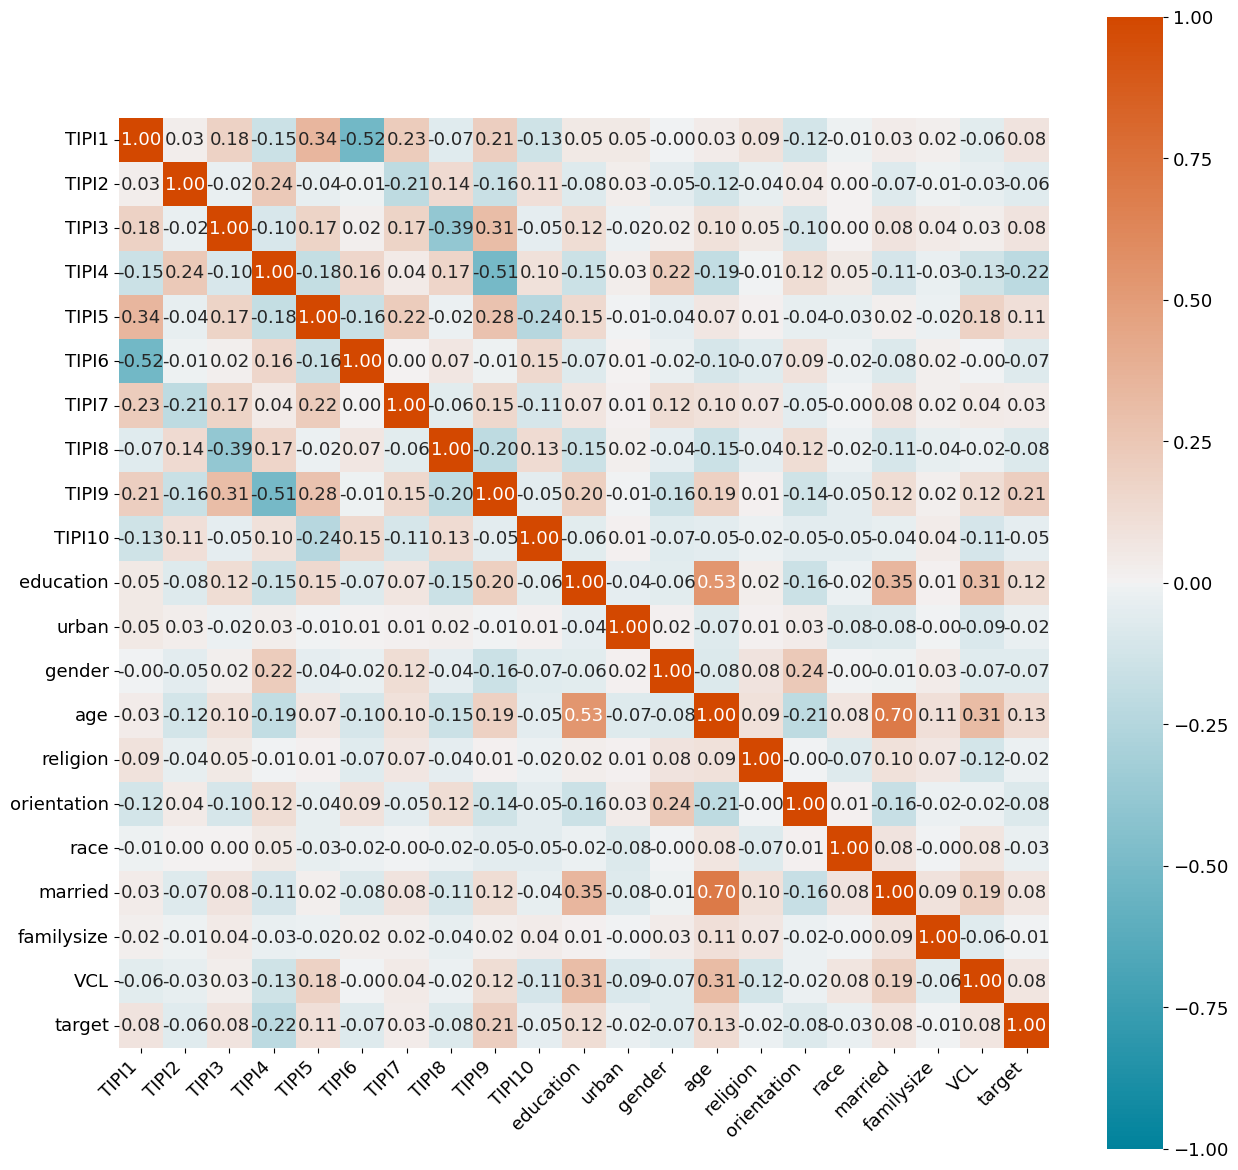

In [223]:
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 15,15
rcParams['figure.dpi'] = 100
corr_g11 = depression_us.corr()
ax = sns.heatmap(
    corr_g11, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, s=100, as_cmap=True),
    square=True,
    annot=True, fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.rc('font',size=13)
plt.show()


In [224]:
depression_us.to_csv('../data/anxiety_us_vcl.csv')

Overall depression

In [225]:
depression_overall = depression[general_questions+['VCL','Condition']]

In [226]:
depression_overall.drop('country',inplace=True,axis=1)

c:\Users\sonal\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [227]:
depression_overall = depression_overall[depression_overall.age <100]

In [228]:
depression_overall = depression_overall[depression_overall.familysize <50]

In [229]:
depression_overall['target']=depression_overall.Condition.astype('category').cat.codes

In [230]:
depression_overall.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,...,gender,age,religion,orientation,race,married,familysize,VCL,Condition,target
0,1,5,7,7,7,7,7,5,1,1,...,2,16,12,1,10,1,2,8,Extremely Severe,0
1,6,5,4,7,5,4,7,7,1,5,...,2,16,7,0,70,1,4,8,Moderate,2
2,2,5,2,2,5,6,5,5,3,2,...,2,17,4,3,60,1,3,7,Mild,1
3,1,1,7,4,6,4,6,1,6,1,...,2,13,4,5,70,1,5,7,Moderate,2
4,2,5,3,6,5,5,5,6,3,3,...,2,19,10,1,10,1,4,10,Extremely Severe,0


In [231]:
depression_overall.to_csv('../data/anxiety_overall.csv')